In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import dowhy

In [2]:
dataset = pd.read_csv("data.csv")
dataset.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [10]:
dataset['grades'] = dataset['G1']+dataset['G2']+dataset['G3']
dataset = dataset.drop(['G1','G2','G3'],axis=1)

In [8]:
import pygraphviz
causal_graph = """digraph {

famsize[label="Family Size"];
Pstatus[label="Parent's Status"];
Medu[label="Mothor's Education"];
Fedu[label="Fathor's Education"];
Mjob[label="Mother's job"];
Fjob[label="Father's job"];
reason[label="Reason to Choose School"];
traveltime[label="Travel Time"];
studytime[label="Study Time"];
failures[label="Past Class Failures"];
schoolsup[label="Extra Educational Support"];
famsup[label="Family Educational Support"];
paid[label="Extra Paid Classes"];
activities[label="Extra-curricular Activities"];
nursery[label="Attended Nursery School"];
higher[label="Wants to Take Higher Education"];
internet[label="Internet Access"];
romantic[label="Romantic Relationship"];
famrel[label="Family Relationships Quality"];
freetime[label="Free Time"];
goout[label="Go Out"];
Dalc[label="Workday Alcohol"];
walc[label="Weekend Alcohol"];
U[label="Unobserved Confounders"];
school;
sex;
age;
address;
guardian;
health;
absences;
grades;

U->{goout,absences,grades};
reason->school;
Pstatus->famsize;
Medu->Mjob;
Fedu->Fjob;
freetime->activities;

traveltime->grades;
studytime->grades;
famsup->grades;
schoolsup->grades;
paid->grades;
higher->grades;
internet->grades;
school->grades;
health->grades;
absences->grades;
}"""


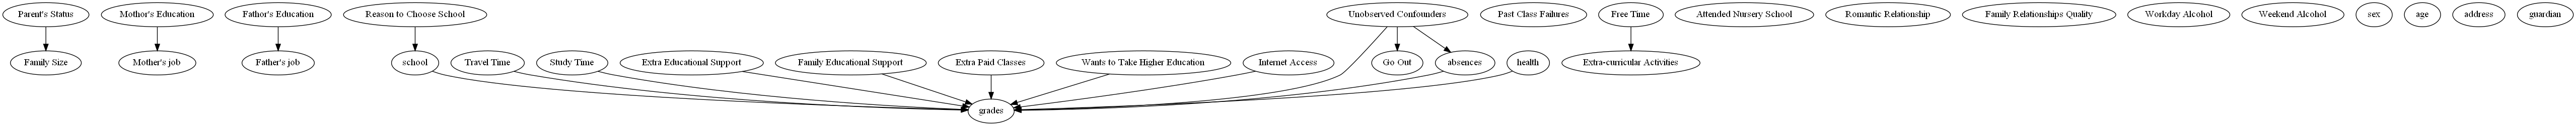

In [9]:
model= dowhy.CausalModel(
        data = dataset,
        graph=causal_graph.replace("\n", " "),
        treatment='reason',
        outcome='grades')
model.view_model()
from IPython.display import Image, display
display(Image(filename="causal_model.png"))

In [10]:
import statsmodels
model= dowhy.CausalModel(
        data = dataset,
        graph=causal_graph.replace("\n", " "),
        treatment="reason",
        outcome='grades')
#Identify the causal effect
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                                                                         
─────────(Expectation(grades|internet,health,failures,famsize,Fjob,age,address
d[reason]                                                                     

                                                                              
,goout,sex,romantic,famsup,Mjob,Dalc,famrel,Medu,paid,freetime,nursery,activit
                                                                              

                                                                          
ies,studytime,schoolsup,Pstatus,absences,Fedu,higher,traveltime,guardian))
                                                                          
Estimand assumption 1, Unconfoundedness: If U→{reason} and U→grades then P(grades|reason,internet,health,failures,famsize,Fjob,age,address,goout,sex,romantic,famsup,Mjob,Dalc,famrel,Medu,paid,freetime,nu

In [12]:
estimate = model.estimate_effect(identified_estimand,
                                 method_name="backdoor.propensity_score_stratification",target_units="ate")
# ATE = Average Treatment Effect
# ATT = Average Treatment Effect on Treated (i.e. those who were assigned a different room)
# ATC = Average Treatment Effect on Control (i.e. those who were not assigned a different room)
print(estimate)

KeyError: 'grades'